<a href="https://colab.research.google.com/github/hager2164/tasks_follow/blob/main/PCA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PCA is typically applied to standardized data. With standardized data "variation" means "correlation". With unstandardized data "variation" means "covariance".


 PCA: instead of describing the data with the original features, we describe it with its axes of variation. The axes of variation become the new features  we call it **Principal Componentes** of data 'the linear conmbinationa or weighted sum of the original features ' .  The weights themselves are called **loadings**

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression

In [8]:
# plt.style.use("seaborn-whitegrid") # Commented out the problematic line
import seaborn as sns
sns.set_style("whitegrid") # Use seaborn's function to set the style

plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [9]:
def plot_variance (pca , width = 8  , dpi = 100 ):
  fig , axs = plt.subplots(1,2, figsize=(width, width/2)) # Changed plt.subplot to plt.subplots and added figsize
  n=pca.n_components_
  grid= np.arange(1,n+1) # Changed pca.n_arange to np.arange
  evr = pca.explained_variance_ratio_   # explained variance
  axs[0].bar(grid , evr)
  axs[0].set(
      xlabel= "component" , title = "% Explained variance" , ylim =(0.0 , 1.0)

  )
  cv = np.cumsum(evr)
  axs[1].plot(np.r_[0,grid] , np.r_[0,cv] , "o-" )
  axs[1].set (
      xlabel= "component" , title = "% Cumulative variance" , ylim =(0.0 , 1.0)
  )
  # Removed fig.set as figsize is set in plt.subplots
  return axs

In [10]:
def make_mi_scores (X,y, discrete_features):
  mi_scores = mutual_info_regression(X,y,discrete_features=discrete_features)
  mi_scores = pd.Series(mi_scores , name = "MI Scores" , index = X.columns)
  mi_scores = mi_scores.sort_values(ascending = False)
  return mi_scores

In [16]:
# Load the dataset from the downloaded directory
df = pd.read_csv("./fe-course-data/autos.csv")

In [13]:
from google.colab import files

print("Please upload your kaggle.json file:")
files.upload()

Please upload your kaggle.json file:


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hageryahya","key":"04cc7f5eaad3bce046a3d283f1afd606"}'}

In [14]:
# Install the Kaggle API client
!pip install kaggle

# Move the kaggle.json file to the correct directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Set permissions for the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json

In [18]:
!kaggle datasets download -d ryanholbrook/fe-course-data
import zipfile
import os
dataset_name = "fe-course-data"
zip_file_name = f"{dataset_name}.zip"
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(f'./{dataset_name}')
print(f"Dataset '{dataset_name}' downloaded and unzipped successfully.")


Dataset URL: https://www.kaggle.com/datasets/ryanholbrook/fe-course-data
License(s): copyright-authors
fe-course-data.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset 'fe-course-data' downloaded and unzipped successfully.


In [19]:
features = ["highway_mpg", "engine_size", "horsepower", "curb_weight"]


In [20]:
X = df.copy()
y=X.pop('price')
X = X.loc[:,features]



In [21]:
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)


In [22]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [23]:
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

In [24]:
X_pca.head()

,PC1,PC2,PC3,PC4
0,0.382486,-0.400222,0.124122,0.169539
1,0.382486,-0.400222,0.124122,0.169539
2,1.550890,-0.107175,0.598361,-0.256081
3,-0.408859,-0.425947,0.243335,0.013920
4,1.132749,-0.814565,-0.202885,0.224138



Terminology for PCA is inconsistent, unfortunately. We're following the convention that calls the transformed columns in X_pca the components, which otherwise don't have a name.

In [25]:
# tanspose the loading matrix so columns and rows become principal components
loadings = pd.DataFrame(
    pca.components_.T,
    columns=component_names,
    index=X.columns,  )
loadings

,PC1,PC2,PC3,PC4
highway_mpg,-0.492347,0.770892,0.070142,-0.397996
engine_size,0.503859,0.626709,0.019960,0.594107
horsepower,0.500448,0.013788,0.731093,-0.463534
curb_weight,0.503262,0.113008,-0.678369,-0.523232


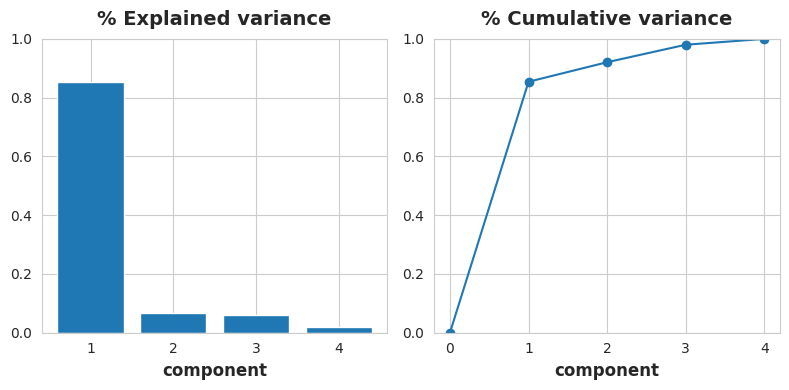

In [26]:
plot_variance(pca);


In [27]:
mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
mi_scores

,MI Scores
PC1,1.014216
PC2,0.379752
PC3,0.306213
PC4,0.204570


In [28]:
idx = X_pca["PC3"].sort_values(ascending=False).index
cols = ["make", "body_style", "horsepower", "curb_weight"]
df.loc[idx, cols]

,make,body_style,horsepower,curb_weight
118,porsche,hardtop,207,2756
117,porsche,hardtop,207,2756
119,porsche,convertible,207,2800
45,jaguar,sedan,262,3950
96,nissan,hatchback,200,3139
...,...,...,...,...
59,mercedes-benz,wagon,123,3750
61,mercedes-benz,sedan,123,3770
101,peugot,wagon,95,3430
105,peugot,wagon,95,3485


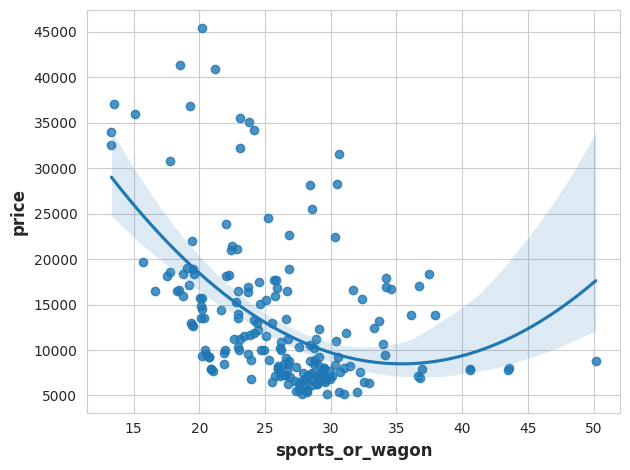

In [29]:
df["sports_or_wagon"] = X.curb_weight / X.horsepower
sns.regplot(x="sports_or_wagon", y='price', data=df, order=2);